In [1]:
import sys
repo_path = '/home/micael.verissimo/paper_lzt/exp-connection-hep/'
sys.path.insert(0, repo_path)

In [2]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)


from ROOT import (kRed, kBlue, kBlack, 
                  TLine,kBird, kOrange, 
                  kGray, kYellow, kViolet, 
                  kGreen, kAzure, kBird, 
                  kBlackBody,gStyle)

import rootplotlib as rpl
rpl.set_lorenzetti_style()
rpl.suppress_root_warnings()

Welcome to JupyROOT 6.30/02

Applying ATLAS style settings...


In [3]:
def_dict = {f'cl_ring_{iring}' : f'cl_rings[{iring}]' for iring in range(100)}
def_dict.update({'mc_e_float'     : 'mc_e[0]',
                 'mc_et_float'    : 'mc_et[0]',
                 'mc_eta_float'   : 'mc_eta[0]',
                 'mc_phi_float'   : 'mc_phi[0]', 
                 'mc_pdgid_float' : 'mc_pdgid[0]'})
s_dict = def_dict.copy()
s_dict.update({'target': '1'})
b_dict = def_dict.copy()
b_dict.update({'target': '0'})


In [4]:
data_path = '~/cern_data/joao.pinto/simulation/v2.1.0/datasets'

parquet_path = os.path.join(repo_path, 'parquet')
electron = os.path.join(data_path, 'user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_single_electron.5to100GeV.eta0phi0.10k_stage_4.result.NTUPLE.merged.root')
pion     = os.path.join(data_path, 'user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_single_pion.5to100GeV.eta0phi0.10k_stage_4.result.NTUPLE.merged.root')

In [5]:

elecron_df = pd.read_parquet(os.path.join(repo_path, 'data/single_electron.parquet'))
pion_df = pd.read_parquet(os.path.join(repo_path, 'data/pion.parquet'))

# Visualize the distributions

In [6]:
def make_1d_histograms(sgn, bkg, bins, xmin, xmax):
    """
    Creates 1D histograms for signal and background data, applies styling, 
    and returns the density histograms.

    Args:
        sgn (array-like): Signal data to be filled into the histogram.
        bkg (array-like): Background data to be filled into the histogram.
        bins (int): Number of bins for the histograms.
        xmin (float): Minimum value of the histogram range.
        xmax (float): Maximum value of the histogram range.

    Returns:
        tuple: A tuple containing two styled density histograms:
            - d_zee: Density histogram for the signal data.
            - d_jets: Density histogram for the background data.
    """
    
    h_sgn = rpl.hist1d.new( 'sgn', bins, xmin ,xmax )
    rpl.hist1d.fill( h_sgn, sgn )
    d_sgn = rpl.hist1d.density( h_sgn )
    d_sgn.SetLineColor(kAzure)
    d_sgn.SetFillColor(kAzure-4)
    h_bkg = rpl.hist1d.new( 'bkg', bins, xmin ,xmax )
    rpl.hist1d.fill( h_bkg, bkg )
    d_bkg = rpl.hist1d.density( h_bkg )
    d_bkg.SetLineColor(kRed)
    d_bkg.SetFillColor(rpl.get_color(kRed, 0.5))
    return d_sgn, d_bkg

def add_legend(x, y, legends):
    """
    Adds a legend to the plot with specified position and legends.
    Args:
        x (float): X-coordinate of the legend position.
        y (float): Y-coordinate of the legend position.
        legends (list): List of legend entries to be added.
    """
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=16, option = 'f' )

In [23]:
GeV = 1e3
sgn = elecron_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_eratio'].values
bkg = pion_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_eratio'].values

o_sgn, o_bkg = make_1d_histograms(sgn, bkg, 100, 0, 1)
fig = rpl.create_canvas('my_eratio_canvas')
rpl.set_figure(fig)

rpl.add_hist( o_sgn,'same, hist' )
rpl.add_hist( o_bkg ,'same, hist' )
rpl.set_xlabel('E_{Ratio}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV', textsize=0.04)
legends = ['Single Electron (Signal)', 'Pion (background)']
add_legend( 0.2,0.6, legends)
rpl.format_canvas_axes( YTitleOffset=2.) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 
fig.savefig(os.path.join(repo_path, 'notebooks/simulation_singe_e_vs_pion_eratio.pdf'))

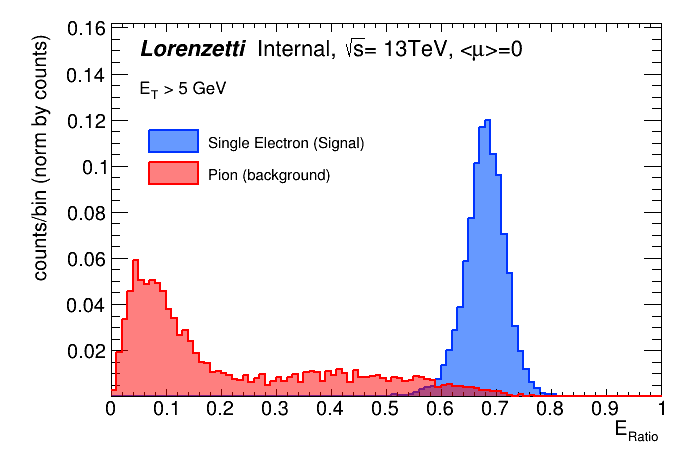

In [24]:
fig.show()

In [26]:
GeV = 1e3
sgn = elecron_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_reta'].values
bkg = pion_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_reta'].values

o_sgn, o_bkg = make_1d_histograms(sgn, bkg, 100, 0.75, 1.05)
fig = rpl.create_canvas('my_reta_canvas')
rpl.set_figure(fig)

rpl.add_hist( o_sgn,'same, hist' )
rpl.add_hist( o_bkg ,'same, hist' )
rpl.set_xlabel('R_{#eta}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV', textsize=0.04)
legends = ['Single Electron (Signal)', 'Pion (background)']
add_legend( 0.2,0.6, legends)
rpl.format_canvas_axes( YTitleOffset=2.) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 

fig.savefig(os.path.join(repo_path, 'notebooks/simulation_single_e_vs_pion_reta.pdf'))



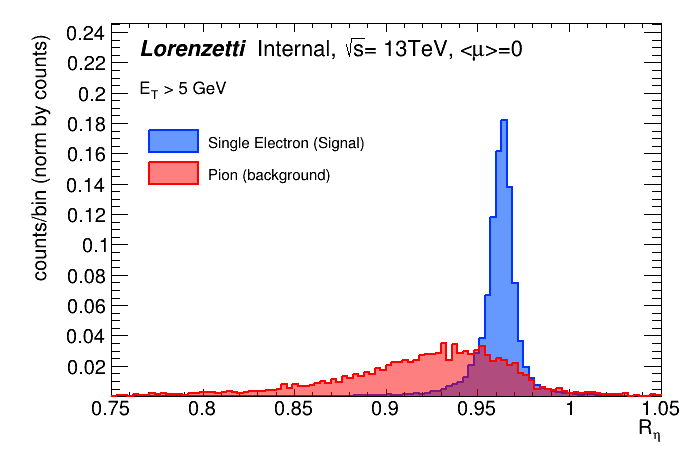

In [27]:
fig.show()

In [ ]:
GeV = 1e3
sgn = elecron_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_reta'].values
bkg = pion_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_reta'].values

o_sgn, o_bkg = make_1d_histograms(sgn, bkg, 100, 0.75, 1.05)
fig = rpl.create_canvas('my_reta_canvas')
rpl.set_figure(fig)

rpl.add_hist( o_sgn,'same, hist' )
rpl.add_hist( o_bkg ,'same, hist' )
rpl.set_xlabel('R_{#eta}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV', textsize=0.04)
legends = ['Single Electron (Signal)', 'Pion (background)']
add_legend( 0.2,0.6, legends)
rpl.format_canvas_axes( YTitleOffset=2.) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 

fig.savefig(os.path.join(repo_path, 'notebooks/simulation_single_e_vs_pion_r.pdf'))



In [31]:
GeV = 1e3
sgn = elecron_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_rhad'].values
bkg = pion_df.query(f"cl_et > 5*{GeV} & cl_eta <= 0.8")['cl_rhad'].values

o_sgn, o_bkg = make_1d_histograms(sgn, bkg, 100, -.04, 0.1)
fig = rpl.create_canvas('my_rhad_canvas')
rpl.set_figure(fig)

rpl.add_hist( o_sgn,'same, hist' )
rpl.add_hist( o_bkg ,'same, hist' )
rpl.set_xlabel('R_{HAD}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV', textsize=0.04)
legends = ['Single Electron (Signal)', 'Pion (background)']
add_legend( 0.6,0.6, legends)
rpl.format_canvas_axes( YTitleOffset=2.) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 

fig.savefig(os.path.join(repo_path, 'notebooks/simulation_single_e_vs_pion_rhad.pdf'))

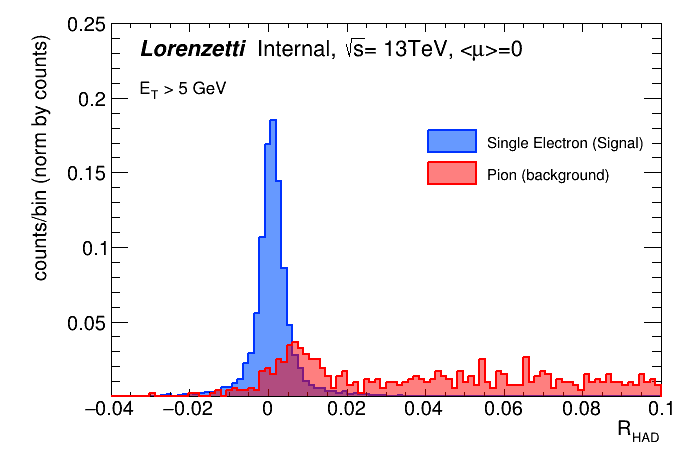

In [29]:
fig.show()